# Part 1


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_data = pd.read_csv("IRIS.csv")

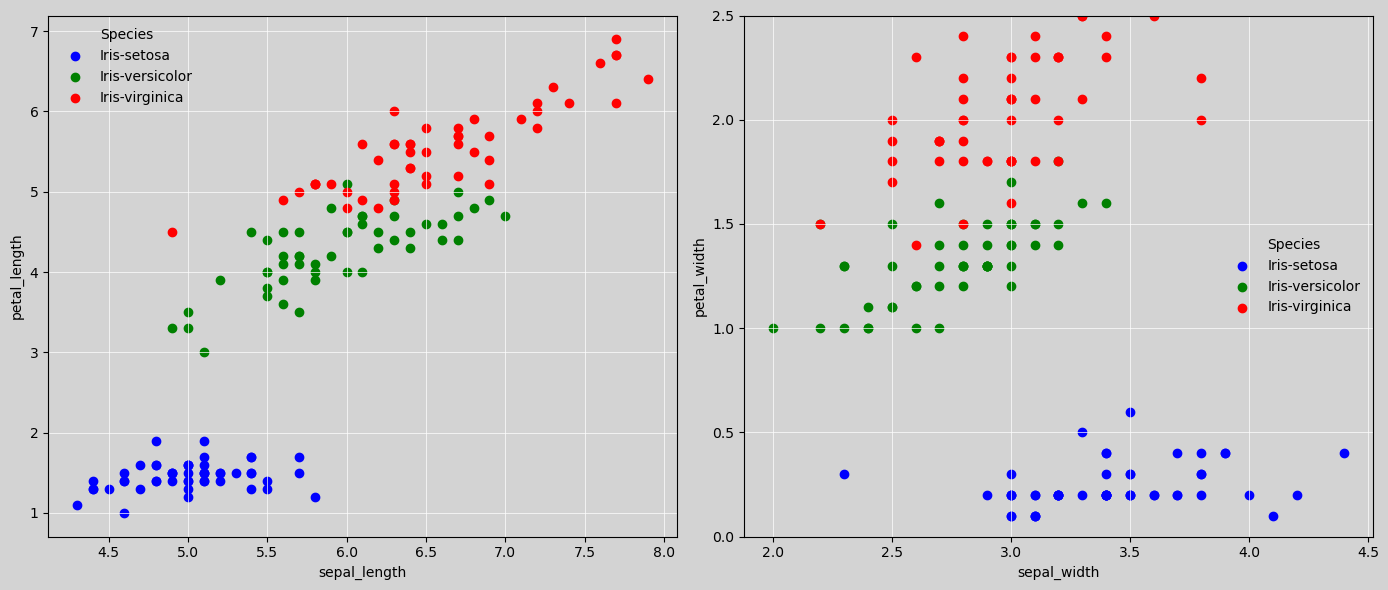

In [3]:
# Trying to make the graphs look as similar as possible to the examples. Thus quite a lot of fiddling.
color_mapping = {
    'Iris-setosa': 'blue',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'red'
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
fig.patch.set_facecolor('lightgray')

for ax in axes:
    ax.set_facecolor('lightgray')
    ax.grid(color='white', linestyle='-', linewidth=0.5)

# First plot
for spec, color in color_mapping.items():
    subset = iris_data[iris_data['species'] == spec]
    axes[0].scatter(subset['sepal_length'], subset['petal_length'], label=spec, color=color, marker='o')
axes[0].set_xlabel('sepal_length')
axes[0].set_ylabel('petal_length')
legend1 = axes[0].legend(title='Species', loc='upper left', frameon=True)
legend1.get_frame().set_alpha(0)

# Second plot
for spec, color in color_mapping.items():
    subset = iris_data[iris_data['species'] == spec]
    axes[1].scatter(subset['sepal_width'], subset['petal_width'], label=spec, color=color, marker='o')
axes[1].set_xlabel('sepal_width')
axes[1].set_ylabel('petal_width')
axes[1].set_ylim(0, 2.5)
legend2 = axes[1].legend(title='Species', loc='center right', frameon=True)
legend2.get_frame().set_alpha(0)

# Show our plots
plt.tight_layout()
plt.show()


When comparing the sepal and petal lengths, we see that there is an approximately linear relashionship between them. Setosa is typically the smallest one, next in size comes Versicolor and Virginica is on average the largest one.
When looking at the sepal and petal widths, we notice that the Setosa has the smallest petal width, next comes Versicolor and Virginica is the largest. For sepal width however we see no significant differences between the species, even if the Setosa could posibly be somewhat larger that the other species.

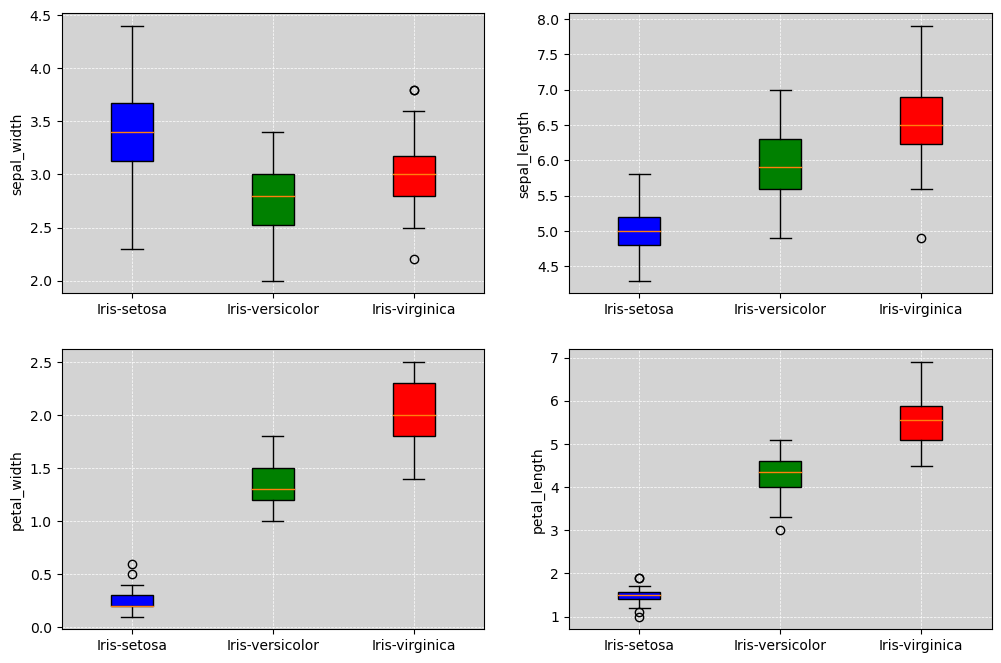

In [4]:
species_col = iris_data.columns[-1]

columns_to_plot = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']

color_map = {
    'Iris-setosa': 'blue',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'red'
}

# Create a 2x2 grid of boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    column = columns_to_plot[i]
    box_data = [iris_data[iris_data[species_col] == sp][column] for sp in color_map.keys()]
    colors = [color_map[sp] for sp in color_map.keys()]
    
    bp = ax.boxplot(box_data, patch_artist=True) 

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_facecolor('lightgray')
    ax.grid(color='white', linestyle='--', linewidth=0.5)

    ax.set_xticklabels(color_map.keys())
    ax.set_ylabel(column)

plt.show()


We see that the sepal width varies the least between species. Sepal length comes second followed by both petal width and length.

It is interesting to note that there is very little variation in petal length and width in the samples for Setosa compared to the other species.

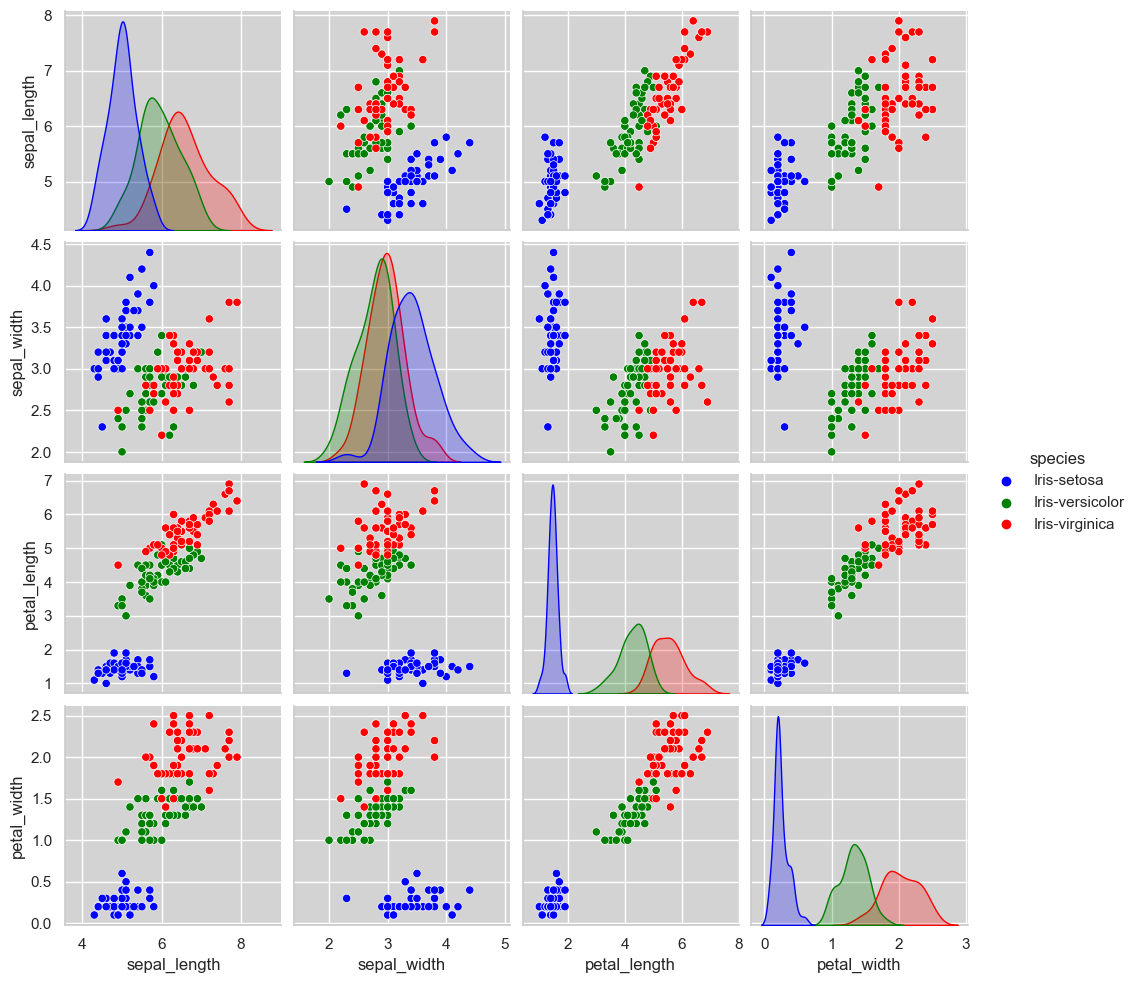

In [5]:
color_map = {
    'Iris-setosa': 'blue',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'red'
}

sns.set(style='whitegrid', rc={"axes.facecolor": "lightgray", "grid.color": "white"})

pairplot = sns.pairplot(
    iris_data,
    hue='species',
    palette=color_map,
    diag_kind='kde',
    corner=False
)

plt.show()


We notice that Setosa is standing out in all pairwise plots while the other two species have more similar distribution. This is especially noticable regarding sepal width and length where they are pretty much overlapping. In the other cases they are mainly disjunct with a few overlaps.

# Part 2

In [6]:
data = pd.read_csv('artportalen.csv')

# Convert date column to datetime format
data['Slutdatum'] = pd.to_datetime(data['Slutdatum'], errors='coerce')

# Questions in the assignment:
# What are the most prevelant species?
prevalence = data['Artnamn'].value_counts()

# What is the monthly distribution of the top 3 most prevalant species
top_3_species = prevalence.head(3).index.tolist()
data['Month'] = data['Slutdatum'].dt.month

monthly_distribution = data[data['Artnamn'].isin(top_3_species)].groupby(['Month', 'Artnamn']).size().unstack()


print("Most Prevalent Species (Top 10):")
print(prevalence.head(10))

print("\nMonthly Distribution of the 3 most prevalent Species:")
print(monthly_distribution)

print("\nRarest Species:")
prevalence.tail(40)


Most Prevalent Species (Top 10):
Koltrast      718
Talgoxe       631
Blåmes        629
Gräsand       531
Storskrake    522
Sothöna       513
Gärdsmyg      486
Ringduva      480
Skogsduva     476
Bofink        452
Name: Artnamn, dtype: int64

Monthly Distribution of the 3 most prevalent Species:
Artnamn  Blåmes  Koltrast  Talgoxe
Month                             
1           147       155      144
2           115       105      119
3           131       127      129
4            97       111       95
5           113       170      111
6            26        50       33

Rarest Species:


Silvertärna                  2
Ob. skarv                    2
Nordsjösilltrut              2
Europeisk skata              2
Stenfalk                     2
Nordlig gulärla              1
Ob. korsnäbb                 1
Kustlabb                     1
Bivråk                       1
Ägretthäger                  1
Röd glada                    1
Ob. gås                      1
Strömstare                   1
Rödbena                      1
Varfågel                     1
Prutgås                      1
Storlom                      1
Rosenfink                    1
Trädlärka                    1
Ormvråk, underarten buteo    1
Bändelkorsnäbb               1
Forsärla                     1
Ob. bo-/bergfink             1
Tornfalk                     1
Spetsbergsgås                1
Ljungpipare                  1
Fjällvråk                    1
Spillkråka                   1
Vinterhämpling               1
Fiskgjuse                    1
Ob. fisk-/silvertärna        1
Lappsparv                    1
Mellansk

## What is the distribution of species by activity?

In [7]:
# Additional questions: What is the distribution of species by activity?
activity_distribution = data['Aktivitet'].value_counts().head(10)
print("Species Distribution by Activity:")
print(activity_distribution)

Species Distribution by Activity:
rastande                         4693
spel/sång                        4356
födosökande                      1822
obs i häcktid, lämplig biotop    1486
förbiflygande                    1180
lockläte, övriga läten            800
stationär                         776
par i lämplig häckbiotop          514
permanent revir                   222
ruvande                           191
Name: Aktivitet, dtype: int64


This data shows that most of the birds are reported while they are on land, and resting. 
Many of the observations are done while the birds are singing, which could mean that they are being noticed just because of this activity.
We have however not enough information to decipher if it really is the case.

## How many observations per area?

In [8]:
# How many observations per area?
province_observations = data['Lokalnamn'].value_counts().head(10)
print("Observations by area:")
print(province_observations)

Observations by area:
Isbladskärret       2303
Tegelhagsskogen     1815
Isbladsviken        1175
Bergshamra           960
Kaknäs skär          934
Ladugårdsgärdet      800
Kaknäs ängar         763
Isbladsmatningen     735
Skeppsholmen         561
Kastellholmen        556
Name: Lokalnamn, dtype: int64


We notice that two areas have a very high observation concentration (Isbladskärret and Tegelhagsskogen) while the other areas are much more even. This might be explained by the fact that Isbladskärret is an area of Djurgården, with a concentration of wildlife. Tegelhagsskogen is located in Sollentuna, close to Ulriksdals castle, which is also an area with concentrations of fauna and flora.

## Who are the top 3 observers for each month?


In [9]:
# What are the top 3 observers for each month?
data['Slutdatum'] = pd.to_datetime(data['Slutdatum'], errors='coerce')
data['Month'] = data['Slutdatum'].dt.month
monthly_observer_counts = data.groupby(['Month', 'Rapportör']).size().reset_index(name='Observations')

top_3_observers_per_month = monthly_observer_counts.sort_values(
    ['Month', 'Observations'], ascending=[True, False]
).groupby('Month').head(3)

print("Top 3 Observers Per Month:")
print(top_3_observers_per_month)

Top 3 Observers Per Month:
     Month         Rapportör  Observations
100      1  Svante Söderholm           979
23       1   Folke K Larsson           152
52       1  Karin Henriksson           148
191      2  Svante Söderholm           753
134      2   Folke K Larsson           192
149      2     Johan Nilsson           158
325      3  Svante Söderholm           629
214      3      Bill Martens           312
236      3   Folke K Larsson           276
476      4  Svante Söderholm          1230
399      4     Johan Nilsson           253
485      4  jesper sollerman           229
675      5  Svante Söderholm          1482
583      5     Johan Nilsson           606
514      5      Bill Martens           339
761      6  Svante Söderholm           355
729      6     Johan Nilsson           214
739      6     Magnus Edberg           133


We see that one obersver is much more active that the others when it comes to number of reported observations. In June, we see however that Svante Söderholm's number of observations is closer to the other ones, but is still a clear number one.

# Part 3

This dataset is designed to provide information on factors associated with strokes. As such, it contains information about medical and lifestyle risk factors, demographic information and lifestyle and habits for 5,110 individuals. For each individual, we get data about its gender, age, prevalence of hypertension and heart disease, information about the individual marital status, its work type, residence type, average glucose level, bmi as well as smoking status.
The dataset can be used to build predictive models for the occurence of stroke. 

Below are three questions that lead to a better understanding / grasp of this dataset:

Stroke Distribution by Gender:
 stroke         0         1
gender                    
Female  0.952906  0.047094
Male    0.948936  0.051064
Other   1.000000       NaN


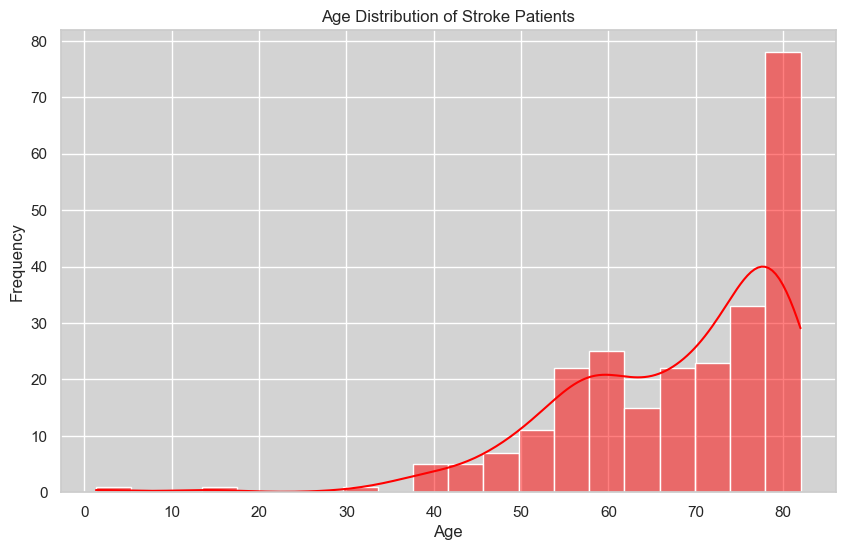

Stroke Prevalence by Work Type:
 stroke                0         1
work_type                        
Govt_job       0.949772  0.050228
Never_worked   1.000000       NaN
Private        0.949060  0.050940
Self-employed  0.920635  0.079365
children       0.997089  0.002911


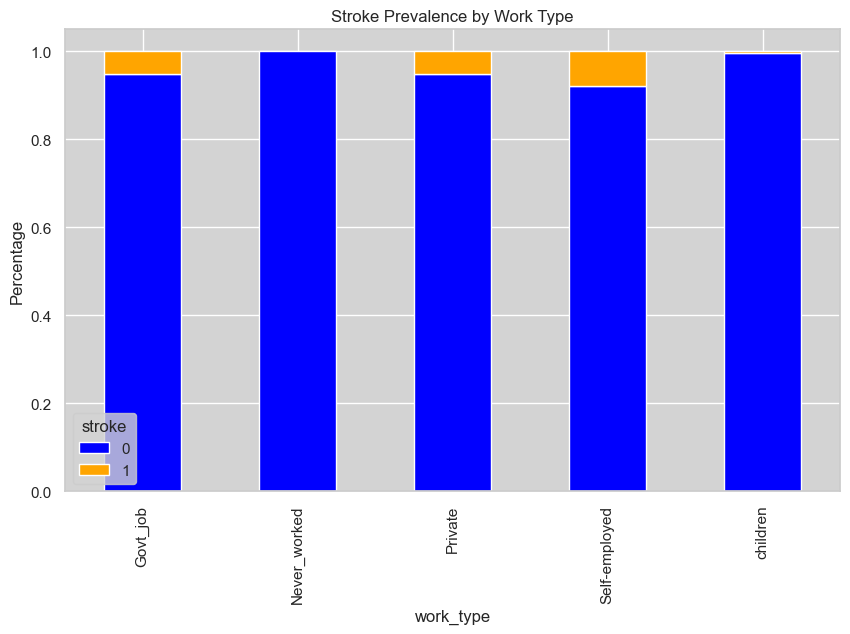

In [10]:
data = pd.read_csv('stroke-data.csv')

# What is the distribution of strokes by gender?
stroke_by_gender = data.groupby('gender')['stroke'].value_counts(normalize=True).unstack()
print("Stroke Distribution by Gender:\n", stroke_by_gender)


# We are now looking closer at the age distribution of stroke patients.
stroke_ages = data[data['stroke'] == 1]['age']
plt.figure(figsize=(10, 6))
sns.histplot(stroke_ages, kde=True, bins=20, color='red')
plt.title("Age Distribution of Stroke Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Finally we choose to look at stroke prevalence depending on work type.
work_type_stroke = data.groupby('work_type')['stroke'].value_counts(normalize=True).unstack()
print("Stroke Prevalence by Work Type:\n", work_type_stroke)

work_type_stroke.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])
plt.title("Stroke Prevalence by Work Type")
plt.ylabel("Percentage")
plt.show()



This analysis leads us to notice that gender does not seem to be strongly affecting the occurence of strokes, but the age is definitely a very strong factor. The older you get, the more likely you are to suffer from a stroke.
Gouvernment, private and self-employed individuals are the most likely to suffer from a stroke, while children and people who have never worked are much more unlikely to be affected. Children are by definition young and people who have never worked are most likely relatively young.